# Jupyter-Notebook zur deskriptiven Statistik

Dieses Notebook demonstriert die Anwendung einiger häufig verwendeter Module zur deskriptive Datenanalyse. 

## Inhalte 
- Es werden simulierte Daten mittels des Moduls [Numpy](https://numpy.org/) erzeugt
- Die Daten werden als [Pandas](https://pandas.pydata.org/docs/) Dataframe formatiert und relevante deskriptive Kennzahlen werden ausgegeben
- Das Modul [Seaborn](https://seaborn.pydata.org/) wird zur grafischen Darstellung der Daten verwendet 


## 1. Daten erzeugen
- Gemessene Daten oder wie in diesem Fall simulierte Daten

In [1]:
# Module importieren
import numpy as np
import pandas as pd

In [2]:
# Anhand von Dictionaries die Verschiebung der Mittelwerte für die Simulation definieren
exp_dict = {1: 0.2, 2: -0.2} # Der Mittelwert der Daten aus Experiment 1 soll um 0,2 verschoben werden, der von Experiment 2 um -0,2
gruppen_dict = {1: -0.5, 2: 0.5} # Verschiebung der Gruppenmittelwerte definieren
bedingung_dict = {1: -0.2, 2: 0, 3: 0.2} # Verschiebung der Bedingungsmittelwerte definieren
N = 20 # Anzahl Werte pro Kombination

In [3]:
# Eine for-Schleife wird verwendet, um die simulierten Daten anzulegen
exp_list, gruppen_list, bedingung_list, werte = [], [], [], [] # Listen zur Speicherung der simulierten Daten initialisieren

for exp, exp_v in exp_dict.items(): # Die for-Schleife durchläuft die Einträge des Experiment-Dictionaries, erster Wert ist die Experimentnummer, zweiter Wert die Verschiebung des Mittelwerts
    for g, g_v in gruppen_dict.items(): # Die for-Schleife durchläuft die Gruppen
        for c, c_v in bedingung_dict.items(): # Die for-Schleife durchläuft die Bedingungen
            exp_list.extend([exp] * N) # N mal die Experimentnummer anhängen
            gruppen_list.extend([g] * N) # N mal die Gruppennummer anhängen
            bedingung_list.extend([c] * N) # N mal die Bedingungsnummer anhängen
            werte.extend(np.random.normal(loc = 1 + exp_v + g_v + c_v, scale = 1, size = 20)) # Zufallsstichprobe aus einer Normalverteilung ziehen, Mittelwert (loc) wird um die Verschiebung aus dem Dictionary angepasst, scale = 1 bedeutet, dass die Standardabweichung 1 beträgt

df = pd.DataFrame(data = {'Experiment': exp_list, 'Gruppe': gruppen_list, 'Bedingung': bedingung_list, 'Wert': werte}) # Erzeugte Daten in ein Pandas DataFrame überführen

In [4]:
# Dataframe als csv-Datei speichern
# df.to_csv('daten_simuliert.csv')

## 2. Daten einlesen und deskriptive Statistik ausgeben lassen

In [5]:
df = pd.read_csv('daten_simuliert.csv', index_col = 0) # Daten aus csv-Datei einlesen
df

,Experiment,Gruppe,Bedingung,Wert
0,1,1,1,0.398269
1,1,1,1,1.068672
2,1,1,1,1.731246
3,1,1,1,1.211970
4,1,1,1,-0.588288
...,...,...,...,...
235,2,2,3,2.726157
236,2,2,3,1.609120
237,2,2,3,-0.507460
238,2,2,3,2.804516


### Struktur eines Pandas Dataframe 
- Zwei-dimensional mit Zeilen und Spalten, wie Tabellen in z.B. Excel
- Alle Spalten haben die gleiche Länge
- Jede Spalte kann einen anderen Datentyp haben

In [6]:
df.dtypes # Datentypen der Spalten anzeigen

Experiment      int64
Gruppe          int64
Bedingung       int64
Wert          float64
dtype: object

In [7]:
df.describe() # Deskriptive Statistik für alle Spalten anzeigen

,Experiment,Gruppe,Bedingung,Wert
count,240.000000,240.000000,240.000000,240.000000
mean,1.500000,1.500000,2.000000,0.970337
std,0.501045,0.501045,0.818203,1.108248
min,1.000000,1.000000,1.000000,-2.047338
25%,1.000000,1.000000,1.000000,0.257855
50%,1.500000,1.500000,2.000000,0.911535
75%,2.000000,2.000000,3.000000,1.725262
max,2.000000,2.000000,3.000000,3.935691


In [8]:
df.mean() # Nur Mittelwerte jeder Spalte anzeigen, die Stufen der einzelnen Faktoren werden hierbei jedoch nicht berücksichtigt

Experiment    1.500000
Gruppe        1.500000
Bedingung     2.000000
Wert          0.970337
dtype: float64

In [9]:
# Mittelwerte jeder Kombination der Stufen aller Faktoren (Experiment, Gruppe, Bedingung) berechnen
df.groupby(['Experiment', 'Gruppe', 'Bedingung']).mean()

Wert
Experiment Gruppe Bedingung          
1          1      1          0.639991
                  2          0.549114
                  3          0.696372
           2      1          1.582419
                  2          1.515598
                  3          1.970408
2          1      1         -0.123494
                  2          0.508091
                  3          0.378307
           2      1          1.213920
                  2          1.215040
                  3          1.498276

In [10]:
# Ebenso die Standardabweichung berechnen
df.groupby(['Experiment', 'Gruppe', 'Bedingung']).std()

Wert
Experiment Gruppe Bedingung          
1          1      1          1.101468
                  2          1.011047
                  3          0.986326
           2      1          0.974794
                  2          0.936778
                  3          1.000382
2          1      1          0.803253
                  2          0.787168
                  3          0.708706
           2      1          1.147862
                  2          0.967600
                  3          0.989415

## 3. Grafische Darstellung der Daten
- Die Daten eines Dataframes können z.B. mittels des Moduls Seaborn dargestellt werden
- Das Seaborn-Modul bietet vielfältige Funktionen zur Erstellung unterschiedlicher Grafiken
- Als Argumente reicht es teilweise aus, lediglich zu spezifizieren, welche Daten angezeigt werden sollen und welche Spalte auf der x- und y-Achse angezeigt werden soll



In [11]:
import seaborn as sns # Modul zum Plotten von Daten importieren

<Axes: xlabel='Gruppe', ylabel='Wert'>

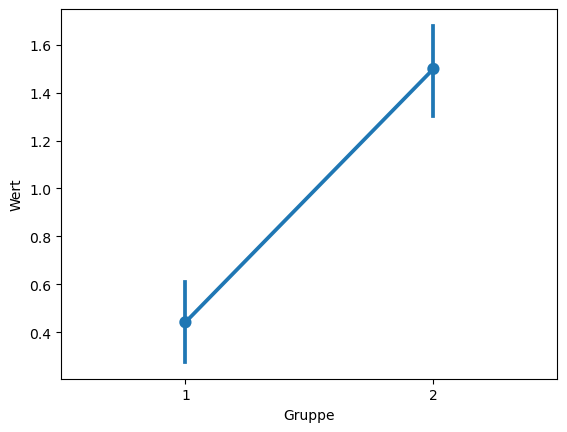

In [12]:
# Eine Grafik mit Mittelwert und Streuung jeder Gruppe erstellen
sns.pointplot(data = df, x = 'Gruppe', y = 'Wert') # Standardmäßig werden 95% Konfidenzintervalle angezeigt

<Axes: xlabel='Bedingung', ylabel='Wert'>

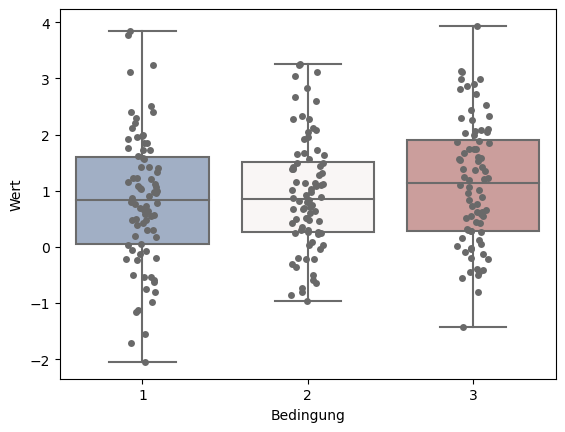

In [13]:
# Die Verteilung der Daten jeder Bedingung anzeigen 
sns.boxplot(data = df, x = 'Bedingung', y = 'Wert', palette = 'vlag') # Boxplot mit Farbpalette 'vlag' erstellen
sns.stripplot(data = df, x = 'Bedingung', y = 'Wert', color = 'dimgray') # Einzelne Datenpunkte als Streudiagramm hinzufügen

<Axes: xlabel='Bedingung', ylabel='Wert'>

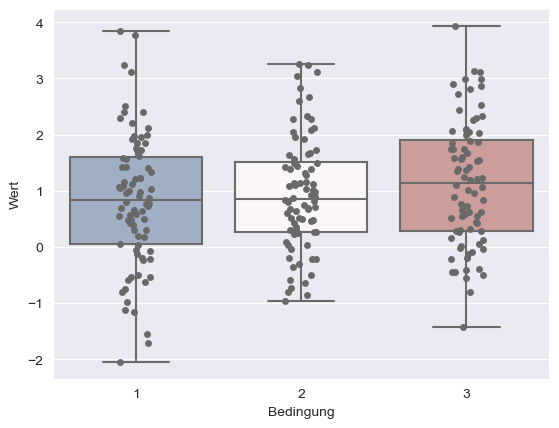

In [14]:
# Unterschiedliche Darstellungsstile können gewählt werden
sns.set_style("darkgrid") # Hintergrund dunkel mit Gitternetz

sns.boxplot(data = df, x = 'Bedingung', y = 'Wert', palette = 'vlag') # Boxplot mit Farbpalette 'vlag' erstellen
sns.stripplot(data = df, x = 'Bedingung', y = 'Wert', color = 'dimgray') # Einzelne Datenpunkte als Streudiagramm hinzufügen

<Axes: xlabel='Bedingung', ylabel='Wert'>

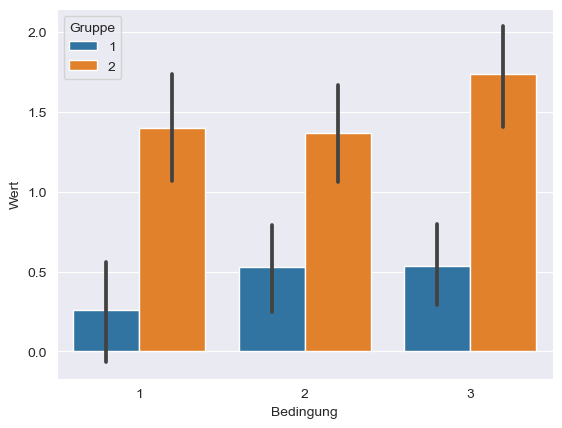

In [15]:
# Mit dem zusätzlichen Argument hue können die Daten nach einer weiteren Variable getrennt dargestellt werden
sns.barplot(data = df, x = 'Bedingung', y = 'Wert', hue = 'Gruppe') # Die Daten werden nach Gruppen getrennt dargestellt

### Mehrere Unterkategorien mit Catplot darstellen
- Wir möchten nun auch die Daten aufgeschlüsselt nach Experiment darstellen
- Die bisherigen Funktionen stoßen bei dieser Aufgabe an ihre Grenzen
- Mit der übergeordneten Funktion catplot können wir jedoch neben der Gruppe und der Bedingung auch diesen dritten Faktor darstellen
- Mit catplot lässt sich festlegen, dass die Kategorien einer Spalte separat mit mehreren Abbildungen visualisiert werden sollen (z.B. Experiment 1 und Experiment 2 in der Experiment-Spalte)
- Zu diesem Zweck erstellt Catplot ein Raster mit mehreren Abbildungen und die Kategorien können beispielsweise aufgeteilt in die Spalten dieses Rasters angezeigt werden


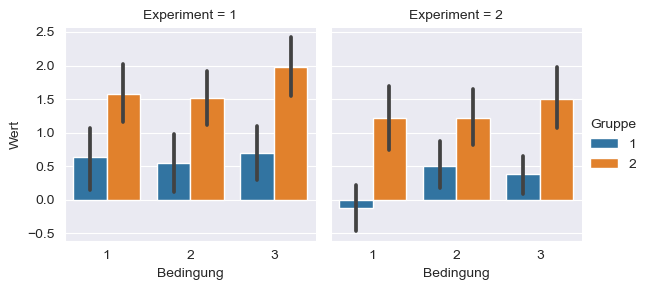

In [16]:
# Nochmal ein Balkendiagramm, jedoch zusätzlich nach Experiment getrennt
sns.catplot(data = df, kind = 'bar', x = 'Bedingung', y = 'Wert', 
            hue = 'Gruppe', col = 'Experiment', height = 3) # Jede Experimentkategorie in einer Spalte ("Column"); height definieren, um die Größe der Diagramme zu verändern

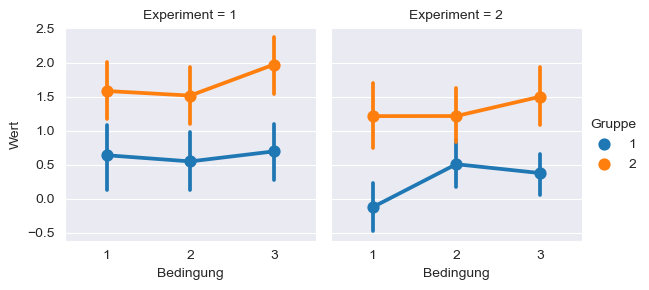

In [17]:
# Mit dem Argument kind können unterschiedliche Abbildungstypen gewählt werden
sns.catplot(data = df, kind = 'point', x = 'Bedingung', y = 'Wert', 
            hue = 'Gruppe', col = 'Experiment', height = 3)

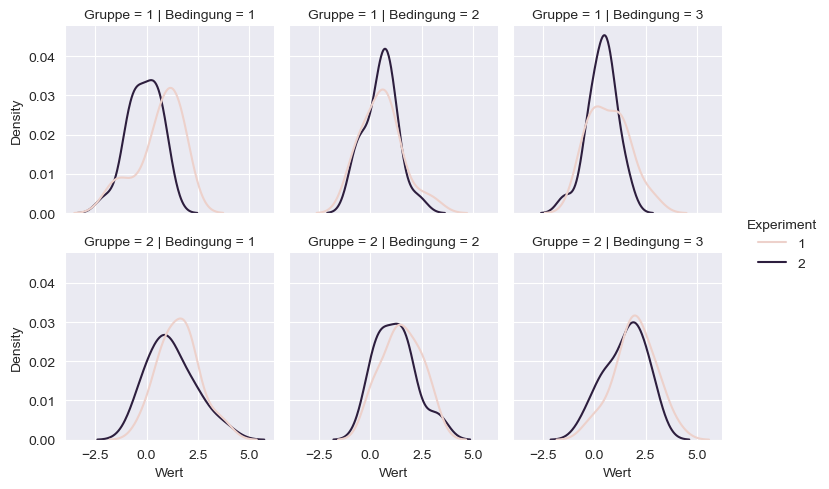

In [18]:
# Die Displot-Funktion funktioniert auf ähnliche Weise und zeigt die Verteilung der Daten
sns.displot(data = df, kind = 'kde', x = 'Wert', 
            row = 'Gruppe', col = 'Bedingung', hue = 'Experiment', height = 2.5) # Jede Gruppe in einer Reihe ("row"), jede Bedingung in einer Spalte ("col"), farblich kodiert nach Experiment ("hue")


### Weiterführende Links
- Weitere Abbildungsbeispiele sind in der [Seaborn-Galerie](https://seaborn.pydata.org/examples/index.html) zu finden
- Information zur Installation von Seaborn: https://seaborn.pydata.org/installing.html